In [2]:
# Handle necessary imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
validation = pd.read_csv('data/validation.csv')

In [3]:
# Sample training data
train.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,...,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,...,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [62]:
# Look at the dataset fields
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

# <span style="color:blue">Data Exploration</span>. 

# 1. Basic Statistics

In [5]:
# Dataset statistics
dataset_stats = pd.DataFrame()
dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
dataset_stats['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
dataset_stats['cost'] = train.groupby('advertiser').payprice.sum().values
dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions) * 1000).round(2)).astype(str)
dataset_stats['eCPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

dataset_stats

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,540293,451,37231239,0.083%,68909.35,82552.64
1,2259,146778,45,13649026,0.031%,92990.95,303311.69
2,2261,120619,37,10789152,0.031%,89448.2,291598.7
3,2821,231416,144,20625766,0.062%,89128.52,143234.49
4,2997,54487,251,3413227,0.461%,62642.96,13598.51
5,3358,304782,233,28145288,0.076%,92345.64,120795.23
6,3386,498554,358,38341028,0.072%,76904.46,107097.84
7,3427,454031,340,36820111,0.075%,81096.03,108294.44
8,3476,346778,175,27481402,0.05%,79247.82,157036.58


# 2. User feedback analysis

In [6]:
# 1. Analyzing CTR per day of the week

daily_CTR = pd.DataFrame()
daily_CTR['day'] = np.sort(train.weekday.unique())

click = train.groupby('weekday').click.value_counts()

imp_1458 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','weekday']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
daily_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
daily_CTR['clicks_3358'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values

daily_CTR['CTR_1458'] = ((daily_CTR.clicks_1458 / daily_CTR.imps_1458) * 100).round(3)
daily_CTR['CTR_3358'] = ((daily_CTR.clicks_3358 / daily_CTR.imps_3358) * 100).round(3)

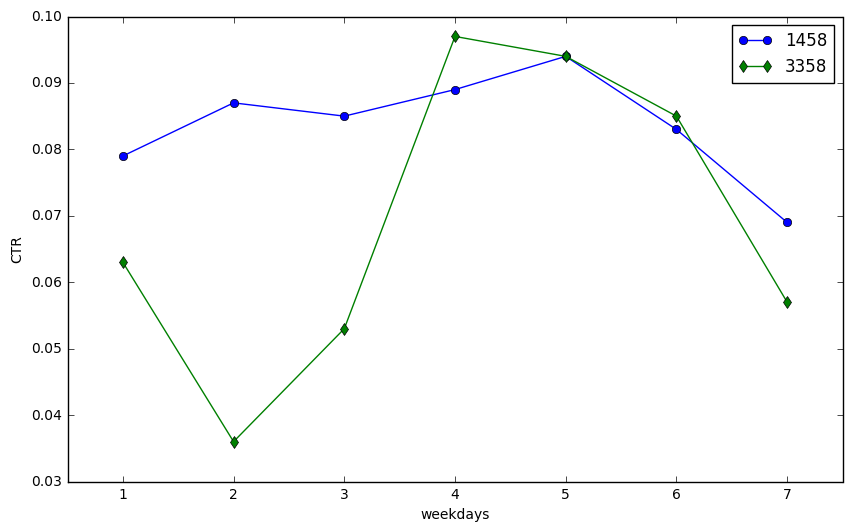

In [69]:
# Line plot of CTR per day of the week for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_1458.values, marker = 'o', label='1458')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3358.values,marker='d', label='3358')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(10,6)
plt.draw()
plt.show()

In [9]:
# 2. Analyzing CTR per hour
hourly_CTR = pd.DataFrame()

hourly_CTR['hour'] = np.sort(train.hour.unique())

imp_1458 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','hour']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
hourly_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
click3358 = list(clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values)
click3358 = click3358[:4] + [0] + click3358[4:]
hourly_CTR['clicks_3358'] = click3358

hourly_CTR['CTR_1458'] = ((hourly_CTR.clicks_1458 / hourly_CTR.imps_1458) * 100).round(3)
hourly_CTR['CTR_3358'] = ((hourly_CTR.clicks_3358 / hourly_CTR.imps_3358) * 100).round(3)

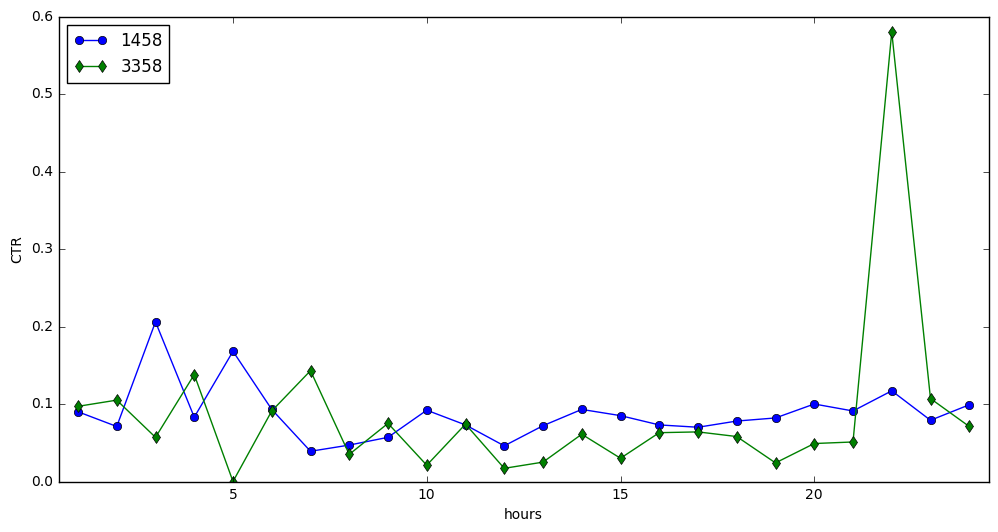

In [68]:
# Line plot of CTR per hour for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = 'o', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3358.values,marker='d', label='3358')
plt.legend(loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
ax.set_xlim(xmin = 0.5 , xmax = 24.5)
f.set_size_inches(12,6)
plt.draw()
plt.show()

In [12]:
# 3. Analyzing CTR per region
region_CTR = pd.DataFrame()

region_CTR['region'] = np.sort(train.region.unique())

imp_1458 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','region']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
region_CTR['clicks_1458'] = clickall_1458.groupby(level='region').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
region_CTR['clicks_3358'] = clickall_3358.groupby(level='region').sum().values

region_CTR['CTR_1458'] = ((region_CTR.clicks_1458 / region_CTR.imps_1458) * 100).round(3)
region_CTR['CTR_3358'] = ((region_CTR.clicks_3358 / region_CTR.imps_3358) * 100).round(3)

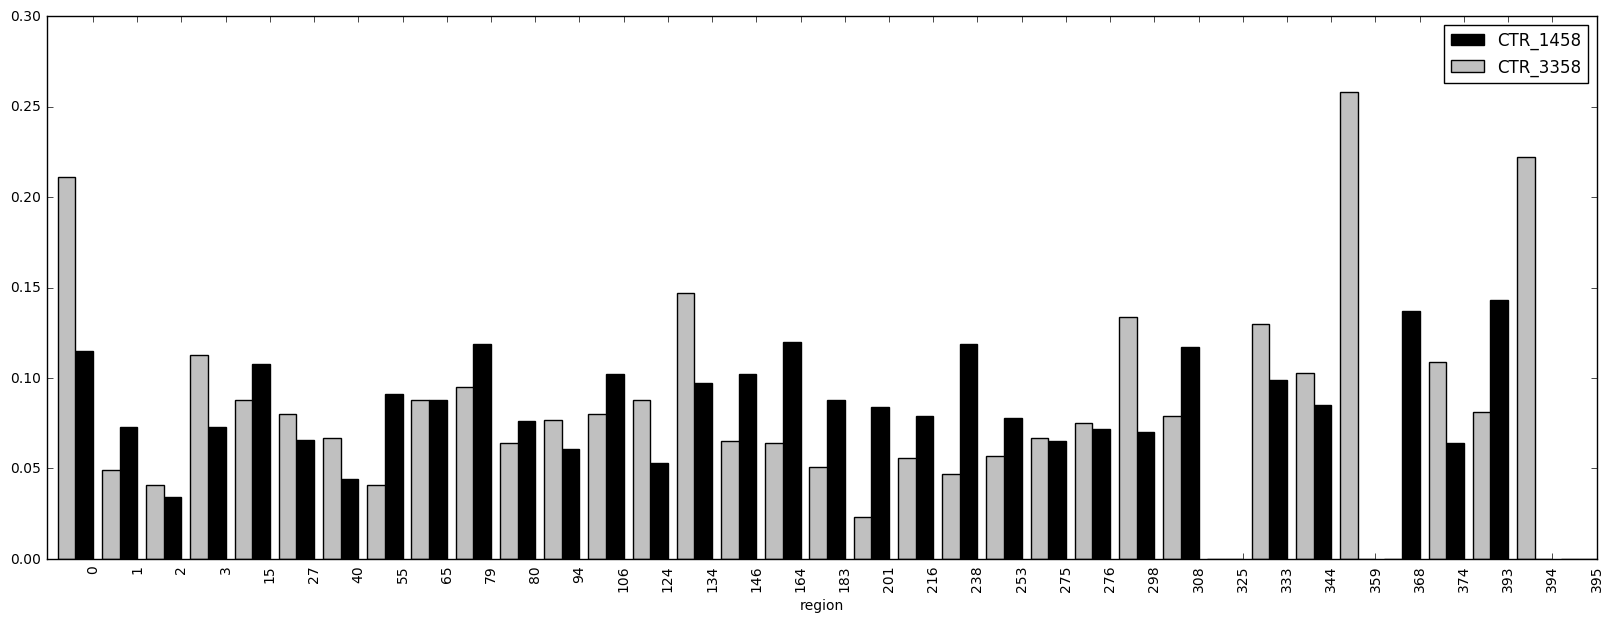

In [501]:
# Bar graph of CTR per region for advertiser 1458 & 3358
a1=region_CTR[['region','CTR_1458']]
ax1 = a1.plot(kind='bar',x='region', color='black',position=1, width=0.4,figsize=(20,7))
a2 = region_CTR[['region','CTR_3358']]
a2.plot(kind='bar',x='region',color='silver',ax=ax1, width=0.4,position=2)

In [32]:
# 4. Analyzing CTR per ad exchange
adexchange_CTR = pd.DataFrame()

adexchange_CTR['ad_exchange'] = np.sort(train.adexchange.unique())
adexchange_CTR = adexchange_CTR.drop([3,4])
imp_1458 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','adexchange']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_1458'] = clickall_1458.groupby(level='adexchange').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_3358'] = clickall_3358.groupby(level='adexchange').sum().values

adexchange_CTR['CTR_1458'] = ((adexchange_CTR.clicks_1458 / adexchange_CTR.imps_1458) * 100).round(3)
adexchange_CTR['CTR_3358'] = ((adexchange_CTR.clicks_3358 / adexchange_CTR.imps_3358) * 100).round(3)

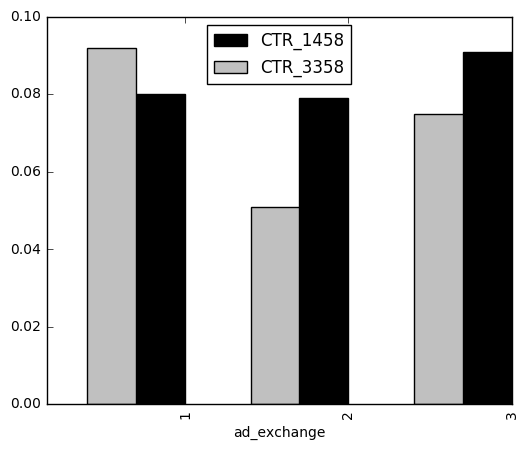

In [505]:
# Bar graph of CTR per ad exchange for advertiser 1458 & 3358
a1=adexchange_CTR[['ad_exchange','CTR_1458']]
ax1 = a1.plot(x=a1.ad_exchange,kind='bar',color='black',position=1,width = 0.3, figsize=(6,5))
a2 = adexchange_CTR[['ad_exchange','CTR_3358']]
a2.plot(x=a1.ad_exchange, kind='bar',color='silver', ax=ax1,width = 0.3, position=2)

In [180]:
# 5. Analyzing CTR per OS
OS_CTR = pd.DataFrame()
os_browser = pd.DataFrame(train.useragent.str.split('_',1).tolist(),columns = ['OS','browser'])
train = pd.concat([train,os_browser],axis=1)

OS_CTR['OS'] = np.sort(train.OS.unique())
imp_1458 = train.groupby('OS').advertiser.value_counts()
OS_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('OS').advertiser.value_counts()
imp_3358 = list(imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values)
OS_CTR['imps_3358'] = imp_3358

click = train.groupby(['advertiser','OS']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
OS_CTR['clicks_1458'] = clickall_1458.groupby(level='OS').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
clickall_3358 = list(clickall_3358.groupby(level='OS').sum().values)
OS_CTR['clicks_3358'] = clickall_3358

OS_CTR['CTR_1458'] = ((OS_CTR.clicks_1458 / OS_CTR.imps_1458) * 100).round(3)
OS_CTR['CTR_3358'] = ((OS_CTR.clicks_3358 / OS_CTR.imps_3358) * 100).round(3)

In [182]:
# 6. Analyzing CTR per browser
browser_CTR = pd.DataFrame()

browser_CTR['browser'] = np.sort(train.browser.unique())
imp_1458 = train.groupby('browser').advertiser.value_counts()
browser_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('browser').advertiser.value_counts()
imp_3358 = list(imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values)
browser_CTR['imps_3358'] = imp_3358

click = train.groupby(['advertiser','browser']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
browser_CTR['clicks_1458'] = clickall_1458.groupby(level='browser').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
clickall_3358 = list(clickall_3358.groupby(level='browser').sum().values)
browser_CTR['clicks_3358'] = clickall_3358

browser_CTR['CTR_1458'] = ((browser_CTR.clicks_1458 / browser_CTR.imps_1458) * 100).round(3)
browser_CTR['CTR_3358'] = ((browser_CTR.clicks_3358 / browser_CTR.imps_3358) * 100).round(3)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C6C7DE668>], dtype=object)

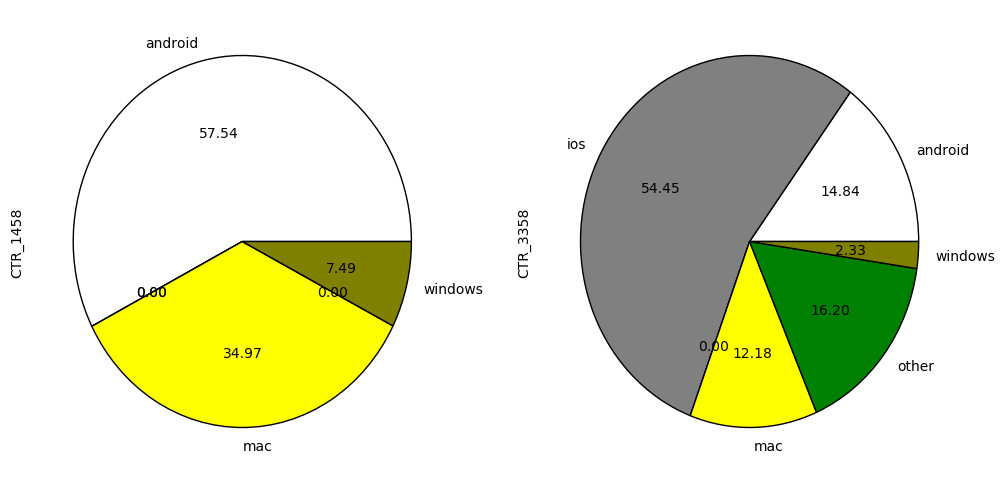

In [196]:
# Pie Chart of CTR per OS for advertiser 1458 & 3358
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
color=['white','grey','red','yellow', 'green','olive','purple','aqua','silver','lime','teal','blue']

a1=OS_CTR[['OS','CTR_1458']]
a1 = a1.set_index('OS')
a1.plot(subplots=True, kind='pie',ax=axes[0],colors=color, autopct='%0.2f',legend=False)
a2 = OS_CTR[['OS','CTR_3358']]
a2 = a2.set_index('OS')
a2.plot(subplots=True, kind='pie',ax=axes[1], colors=color ,autopct='%0.2f',legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CF35D0940>], dtype=object)

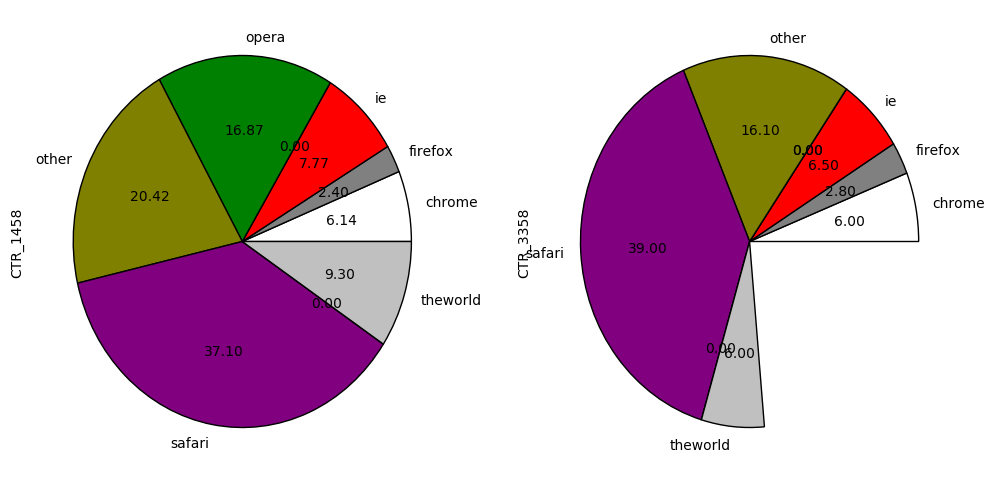

In [508]:
# Pie Chart of CTR per browser for advertiser 1458 & 3358
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
color=['white','grey','red','yellow', 'green','olive','purple','aqua','silver','lime','teal','blue']
a3=browser_CTR[['browser','CTR_1458']]
a3 = a3.set_index('browser')
a3.plot(subplots=True, kind='pie',ax=axes[0],colors=color, autopct='%0.2f',legend=False)
a4 = browser_CTR[['browser','CTR_3358']]
a4 = a4.set_index('browser')
a4.plot(subplots=True, kind='pie',ax=axes[1], colors=color ,autopct='%0.2f',legend=False)

In [416]:
# 7. Analyzing CTR per tags
slotsize_CTR = pd.DataFrame()

slotsize_CTR['slotsize'] = np.sort(train.slotsize.unique())
imp_1458 = train.groupby('slotsize').advertiser.value_counts()
a = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].index.get_level_values(0)
b= pd.DataFrame(list(set(slotsize_CTR.slotsize.tolist())-set(a)))
c = pd.DataFrame(imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].index.get_level_values(0).tolist())
c['values'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values
d = pd.concat([c,b]).fillna(0)
d.columns = ['slotsize','values']
slotsize_CTR['values'] = 0
e = slotsize_CTR.merge(d,on='slotsize')
e = e.drop('values_x',axis=1)
e.values_y = e.values_y.astype(int)
slotsize_CTR['imps_1458'] = e.values_y

slotsize_CTR['slotsize'] = np.sort(train.slotsize.unique())
imp_3358 = train.groupby('slotsize').advertiser.value_counts()
a = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].index.get_level_values(0)
b= pd.DataFrame(list(set(slotsize_CTR.slotsize.tolist())-set(a)))
c = pd.DataFrame(imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].index.get_level_values(0).tolist())
c['values'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values
d = pd.concat([c,b]).fillna(0)
d.columns = ['slotsize','values']
slotsize_CTR['values'] = 0
e = slotsize_CTR.merge(d,on='slotsize')
e = e.drop('values_x',axis=1)
e.values_y = e.values_y.astype(int)
slotsize_CTR['imps_3358'] = e.values_y
slotsize_CTR = slotsize_CTR.drop('values',axis=1)

C:\Users\SAID_ABDULLAHI\Anaconda2\envs\python35\lib\site-packages\pandas\indexes\api.py:71: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  result = result.union(other)


In [471]:
click = train.groupby(['advertiser','slotsize']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
a=pd.DataFrame(clickall_1458.groupby(level='slotsize').sum().index.get_level_values(0))
b=pd.DataFrame(clickall_1458.groupby(level='slotsize').sum().values)
c=pd.concat([a,b],axis=1)
c.columns = ['slotsize','clicks_1458']
slotsize_CTR = slotsize_CTR.merge(c,how='outer',on='slotsize').fillna(0)
slotsize_CTR = slotsize_CTR.drop(['clicks_1458_x','clicks_1458_y'], axis=1)
slotsize_CTR.clicks_1458 = slotsize_CTR.clicks_1458.astype(int)

In [492]:
clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
a=pd.DataFrame(clickall_3358.groupby(level='slotsize').sum().index.get_level_values(0))
b=pd.DataFrame(clickall_3358.groupby(level='slotsize').sum().values)
c=pd.concat([a,b],axis=1)
c.columns = ['slotsize','clicks_3358']
slotsize_CTR = slotsize_CTR.merge(c,how='outer',on='slotsize').fillna(0)
slotsize_CTR = slotsize_CTR.drop(['clicks_3358_x','clicks_3358_y'], axis=1)
slotsize_CTR.clicks_3358 = slotsize_CTR.clicks_3358.astype(int)

slotsize_CTR['CTR_1458'] = ((slotsize_CTR.clicks_1458 / slotsize_CTR.imps_1458) * 100).round(3)
slotsize_CTR['CTR_3358'] = ((slotsize_CTR.clicks_3358 / slotsize_CTR.imps_3358) * 100).round(3)
slotsize_CTR = slotsize_CTR.fillna(0)

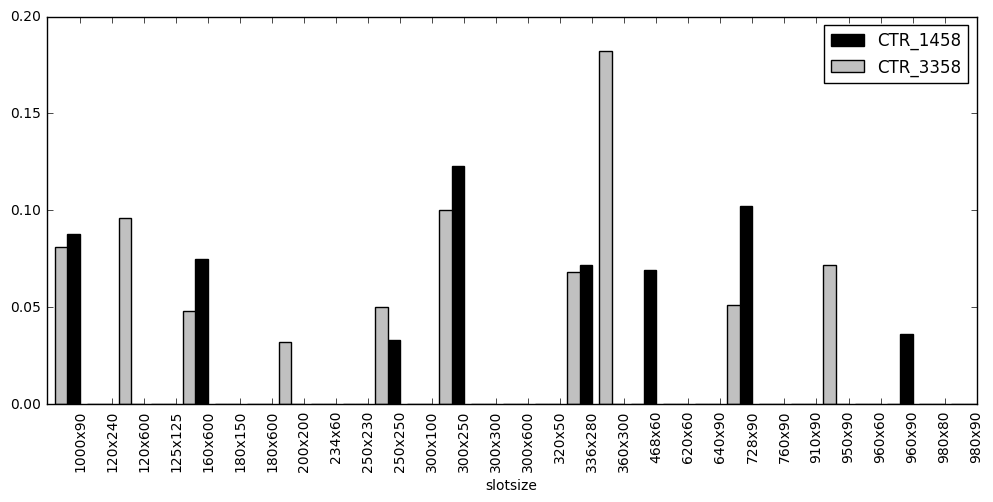

In [496]:
# Bar graph of CTR per slot size for advertiser 1458 & 3358
a1=slotsize_CTR[['slotsize','CTR_1458']]
ax1 = a1.plot(x=a1.slotsize,kind='bar',color='black',position=1,width = 0.4, figsize=(12,5))
a2 = slotsize_CTR[['slotsize','CTR_3358']]
a2.plot(x=a1.slotsize, kind='bar',color='silver', ax=ax1,width = 0.4, position=2)